In [1]:
#importing pandas
import pandas as pd
import nltk

In [2]:
#reading the file
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)


In [3]:
#exploratory data anaysis
train.head()


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
#exploration again
print(train.shape)

(25000, 3)


In [5]:
#still exploring
print(train.columns.values)


['id' 'sentiment' 'review']


In [6]:
#viewing the structure of data we need to work on
print(train.review[0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [7]:
#using BeautifulSoup to clean data initially
from bs4 import BeautifulSoup
#the html tags and comments etc are reomved and stored as example1
example1 = BeautifulSoup(train.review[0],"html.parser")

In [8]:
#by using .get_text() method we can see the only texts in the html document
#it is also better as compared to the raw html doc
print(example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

In [9]:

#removing numbers
import re
# a '^' within square brackets searches anything other than the one on it
# hence here it matches everything numbers and punctuations etc , leaving only the words
letters_only = re.sub("[^a-zA-Z]"," ",example1.get_text())
print(letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [10]:
# changing all the words to lowercase to create a bag of words later
lower_case = letters_only.lower()
# the whole doc is now split to create an array from which most common words called "stop words" will be removed
words = lower_case.split()

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
#importing stopwords from nltk
#some stopwords in english language are
print(stopwords)

[nltk_data] Downloading package stopwords to C:\Users\KARTHEEK
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there'

In [12]:
#removing most common words from doc
words = [w for w in words if w not in stopwords]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [13]:
# the above code cleans only one review , let's make a function from above code that can clean all the reviews
def review_to_words(raw_review):
    #remove html using BeautifulSoup
    review_text = BeautifulSoup(raw_review,"html.parser").get_text()
    #removing raw letters,numbers,punctuations
    letters_only = re.sub("[^a-zA-Z]"," ",review_text)
    #creating an array , resolving whitespaces
    words = letters_only.lower().split()
    #create an array of stopwords so that we don't have to access corpus to search for a stopword
    stop = set(stopwords)
    #removing stopwords from the raw_review
    meaningful_words = [w for w in words if w not in stop]
    #return a string with only the words that are important
    return(" ".join(meaningful_words))

In [14]:
#checking if our function works properly
check_review = review_to_words(train.review[0])
print(check_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [15]:
#finding the number of reviews
num_reviews = train.review.size
print("number of reviews :",num_reviews)

number of reviews : 25000


In [16]:
#storing all reviews at one place
clean_train_reviews = []
for i in range(num_reviews):
    clean_train_reviews.append(review_to_words(train.review[i]))
    if(i%5000==0):
        print("cleaning in process . . . . . . ")
        #included an extra line to visualize if our code is working properly or not
        print("cleaned ",i,"reviews till now")
print("cleaning complete")

cleaning in process . . . . . . 
cleaned  0 reviews till now
cleaning in process . . . . . . 
cleaned  5000 reviews till now
cleaning in process . . . . . . 
cleaned  10000 reviews till now
cleaning in process . . . . . . 
cleaned  15000 reviews till now
cleaning in process . . . . . . 
cleaned  20000 reviews till now
cleaning complete


In [17]:
print("Creating a bag of words . . . . . ")
#import CountVectorizer to create token counts of document
from sklearn.feature_extraction.text import CountVectorizer
#initializing the parameters as None so that we can write and manipulate the processing by our own
vectorizer = CountVectorizer(analyzer="word",
                            tokenizer=None,
                            preprocessor=None,
                            stop_words=None,
                            max_features=5000)
#train the classifer using fit_transform() method
train_data_features = vectorizer.fit_transform(clean_train_reviews)
#change the classifier into array
train_data_features = train_data_features.toarray()

Creating a bag of words . . . . . 


In [18]:
print(train_data_features.shape)

(25000, 5000)


In [19]:
#see all the features names
vocab = vectorizer.get_feature_names()
print(" , ".join(vocab[0:10])," . . . . "," , ".join(vocab[-10:]))

abandoned , abc , abilities , ability , able , abraham , absence , absent , absolute , absolutely  . . . .  yet , york , young , younger , youth , zero , zizek , zombie , zombies , zone


In [20]:
import numpy as np
#frequency of each word is found using np.sum()
dist = np.sum(train_data_features,axis=0)
ct = 0
for tag,count in zip(vocab,dist):
    print(tag,":",count,end=" ")

abandoned : 187 abc : 125 abilities : 108 ability : 454 able : 1259 abraham : 85 absence : 116 absent : 83 absolute : 352 absolutely : 1485 absurd : 306 abuse : 192 abusive : 91 abysmal : 98 academy : 297 accent : 485 accents : 203 accept : 300 acceptable : 130 accepted : 144 access : 92 accident : 318 accidentally : 200 accompanied : 88 accomplished : 124 according : 296 account : 186 accuracy : 81 accurate : 284 accused : 123 achieve : 179 achieved : 139 achievement : 124 acid : 90 across : 971 act : 1251 acted : 658 acting : 6490 action : 3354 actions : 311 activities : 83 actor : 2389 actors : 4486 actress : 1219 actresses : 369 acts : 394 actual : 793 actually : 4237 ad : 148 adam : 302 adams : 98 adaptation : 453 adaptations : 80 adapted : 154 add : 810 added : 439 adding : 166 addition : 347 adds : 337 adequate : 113 admire : 124 admit : 621 admittedly : 134 adorable : 101 adult : 510 adults : 376 advance : 100 advanced : 90 advantage : 153 adventure : 510 adventures : 204 adver

: 82 decent : 1157 decide : 482 decided : 705 decides : 546 decision : 240 decisions : 105 dedicated : 99 dee : 82 deep : 653 deeper : 177 deeply : 320 defeat : 107 defend : 95 defense : 86 defined : 87 definite : 117 definitely : 1580 definition : 83 degree : 204 del : 97 deliberately : 108 delight : 157 delightful : 274 deliver : 328 delivered : 243 delivering : 94 delivers : 356 delivery : 184 demand : 90 demands : 113 demented : 89 demise : 79 demon : 183 demons : 192 deniro : 82 dennis : 176 dentist : 152 denzel : 141 department : 194 depicted : 210 depicting : 82 depiction : 172 depicts : 90 depressed : 99 depressing : 226 depression : 129 depth : 511 der : 86 derek : 151 descent : 89 describe : 330 described : 233 describes : 102 description : 175 desert : 250 deserve : 287 deserved : 291 deserves : 591 design : 342 designed : 206 designs : 91 desire : 304 desired : 91 despair : 86 desperate : 323 desperately : 179 desperation : 104 despite : 1364 destiny : 104 destroy : 219 des

homer : 103 homosexual : 90 honest : 481 honestly : 453 honesty : 99 hong : 191 honor : 173 hood : 162 hook : 99 hooked : 139 hop : 95 hope : 1447 hoped : 144 hopefully : 214 hopeless : 82 hopes : 273 hoping : 407 hopper : 98 horrendous : 134 horrible : 1201 horribly : 214 horrid : 116 horrific : 159 horrifying : 95 horror : 3592 horrors : 124 horse : 298 horses : 145 hospital : 356 host : 146 hot : 688 hotel : 397 hour : 1188 hours : 983 house : 2184 household : 84 houses : 105 howard : 260 however : 3537 hudson : 141 huge : 944 hugh : 111 huh : 138 human : 1596 humanity : 282 humans : 319 humble : 94 humor : 1311 humorous : 263 humour : 441 hundred : 149 hundreds : 151 hung : 98 hunt : 222 hunter : 239 hunters : 90 hunting : 143 hurt : 382 hurts : 99 husband : 1026 husbands : 79 hyde : 96 hype : 134 hysterical : 117 ian : 132 ice : 282 icon : 85 idea : 2043 ideal : 103 ideas : 595 identify : 130 identity : 256 idiot : 185 idiotic : 145 idiots : 118 ignorant : 96 ignore : 177 ignored 

79 orders : 109 ordinary : 267 original : 3376 originality : 171 originally : 290 orleans : 85 orson : 96 oscar : 861 oscars : 146 othello : 87 others : 1595 otherwise : 670 ought : 114 outcome : 118 outer : 104 outfit : 101 outrageous : 124 outside : 596 outstanding : 417 overacting : 87 overall : 1434 overcome : 154 overdone : 120 overlook : 86 overlooked : 128 overly : 249 overrated : 114 overwhelming : 109 owen : 87 owner : 263 oz : 102 pace : 550 paced : 300 pacing : 295 pacino : 202 pack : 152 package : 82 packed : 157 page : 390 paid : 358 pain : 379 painful : 417 painfully : 240 paint : 192 painted : 102 painting : 136 pair : 241 pal : 91 palace : 84 palance : 79 palma : 108 paltrow : 94 pamela : 85 pan : 103 panic : 116 pants : 94 paper : 226 par : 229 parallel : 89 paranoia : 93 parent : 119 parents : 762 paris : 405 park : 371 parker : 243 parody : 246 part : 4042 particular : 730 particularly : 1079 parties : 87 partly : 127 partner : 277 parts : 1191 party : 550 pass : 420

: 85 spanish : 281 spare : 107 spark : 79 speak : 522 speaking : 405 speaks : 202 special : 2113 specially : 85 species : 96 specific : 135 specifically : 101 spectacular : 248 speech : 200 speed : 249 spell : 137 spend : 508 spending : 133 spends : 187 spent : 536 spider : 87 spielberg : 154 spike : 133 spin : 152 spirit : 544 spirited : 127 spirits : 106 spiritual : 125 spite : 179 splatter : 100 splendid : 123 split : 144 spock : 92 spoil : 214 spoiled : 123 spoiler : 406 spoilers : 570 spoke : 91 spoken : 169 spoof : 171 spooky : 124 sport : 108 sports : 228 spot : 379 spots : 143 spread : 91 spring : 124 spy : 205 square : 93 st : 360 stack : 79 staff : 109 stage : 714 staged : 111 stale : 87 stallone : 91 stan : 144 stand : 815 standard : 448 standards : 355 standing : 249 stands : 398 stanley : 168 stanwyck : 161 star : 2087 stargate : 83 staring : 93 starred : 183 starring : 484 stars : 1695 start : 1700 started : 963 starting : 283 starts : 1220 state : 533 stated : 132 statem

In [21]:
startswith = []
for val in vocab:
    if(val[0] not in startswith):
        startswith.append(val[0])
print(startswith)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z']


In [22]:
#counting the total numbers of words starting
counts = np.zeros((len(startswith)),dtype=np.int)
for val in vocab:
    index = startswith.index(val[0])
    counts[index] += 1
print(counts)

[316 270 470 301 226 250 151 191 158  71  63 199 276 111  89 336  16 286
 593 267  80  68 193  14   5]


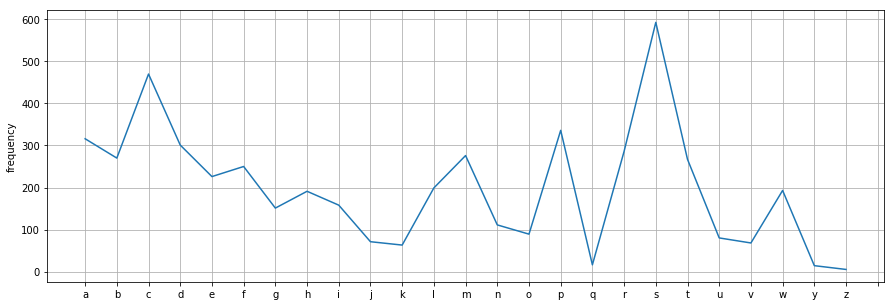

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1,figsize=(15,5))
plt.plot(counts)
nums = [i for i in range(26)]
plt.xticks(nums,startswith)
plt.grid()

plt.ylabel("frequency")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
print("fitting RandomForest . . . ")
forest = forest.fit(train_data_features,train["sentiment"])

fitting RandomForest . . . 


In [25]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
print("fitting NaiveBayes . . . ")
naive.fit(train_data_features,train["sentiment"])

fitting NaiveBayes . . . 


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators = 100)
print("fitting AdaBoost . . . ")
adaboost.fit(train_data_features,train["sentiment"])
print("fitting complete.")

fitting AdaBoost . . . 
fitting complete.


In [28]:
test = pd.read_csv("testData.tsv",header=0,delimiter="\t",quoting=3)
print("shape :",test.shape)
print(test.info())

shape : (25000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
id        25000 non-null object
review    25000 non-null object
dtypes: object(2)
memory usage: 390.7+ KB
None


In [29]:
num_reviews = len(test["review"])
clean_test_reviews = []
print("Cleaning and parsing . . . . ")
for i in range(0,num_reviews):
    if((i+1)%3000 == 0):
        print(i+1," reviews processed . . .")
    clean_review = review_to_words(test["review"][i])
    clean_test_reviews.append(clean_review)
print("processing complete.")

Cleaning and parsing . . . . 
3000  reviews processed . . .
6000  reviews processed . . .
9000  reviews processed . . .
12000  reviews processed . . .
15000  reviews processed . . .
18000  reviews processed . . .
21000  reviews processed . . .
24000  reviews processed . . .
processing complete.


In [31]:
test_data_features = vectorizer.fit_transform(clean_test_reviews)
test_data_features = test_data_features.toarray()
print("predicting using RandomForest . . . ")
result1 = forest.predict(test_data_features)
print("predicting using Naive Bayes . . . ")
result2 = naive.predict(test_data_features)
print("predicting using AdaBoost . . . ")
result3 = adaboost.predict(test_data_features)

predicting using RandomForest . . . 
predicting using Naive Bayes . . . 
predicting using AdaBoost . . . 


In [33]:
result = result1+result2+result3
for i in range(25000):
    if(result[i]==1):
        result[i]=0
    elif(result[i]==2):
        result[i]=1
    elif(result[i]==3):
        result[i]=1
output = pd.DataFrame(data = {"id":test["id"],"sentiment":result})
output.to_csv("output/Bag_of_Words_model.csv", index=False, quoting=3)